## Exploratory Data Analysis of Cars dataset
I found the dataset from kaggle but unfortunately I lost it.

## Exploring data and plotting stuff I found interesting
- Plotting transmission by year - how stick shift became a niche over time
- Engine cylinders by manufacturers - popular engines of manufacturers, like Porsche flat 6 and Ferrari V8s and V12s
- Relationship of number of cylinders and fuel consumption - you don't want to drive big engines in traffic

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
df = pd.read_csv('car_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [129]:
# there's a lot of null values in the market category section but that's fine
# because i am more interested in other technical features
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

### american to metric conversion
they use metric here so mpg (miles per gallon) is a bit weird for us. \
but we can easily convert it to liters per 100km which is the common measurement here. \
that's one of my goals for this analysis

### conversion
unit conversion is more boring than statistics, so i'll spare the details.
235.21 / mpg gives us l/100km

In [130]:
# well this is interesting
df.describe()

# column names are weird and not consistent. a bit annoying, so i want to fix them

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


## Fixes
- rename the columns for consistency
- convert mpg to l/100km
- get a dataframe of only numeric columns

In [131]:
# rename columns
renamed_columns = {'highway MPG': 'Highway l/100km', 'city mpg': 'City l/100km', 'Driven_Wheels': 'Driven Wheels'}
df.rename(columns=renamed_columns, inplace=True)

In [132]:
# metric column

df['Highway l/100km'] = 235.21 / df['Highway l/100km']
df['City l/100km'] = 235.21 / df['City l/100km']
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,Highway l/100km,City l/100km,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,9.468130,13.082977,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,2.377543,3.505848,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,0.664435,1.716861,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,7.840333,10.691364,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,9.046538,13.067222,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,10.691364,14.700625,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,19.600833,33.601429,5657.000000,2.065902e+06


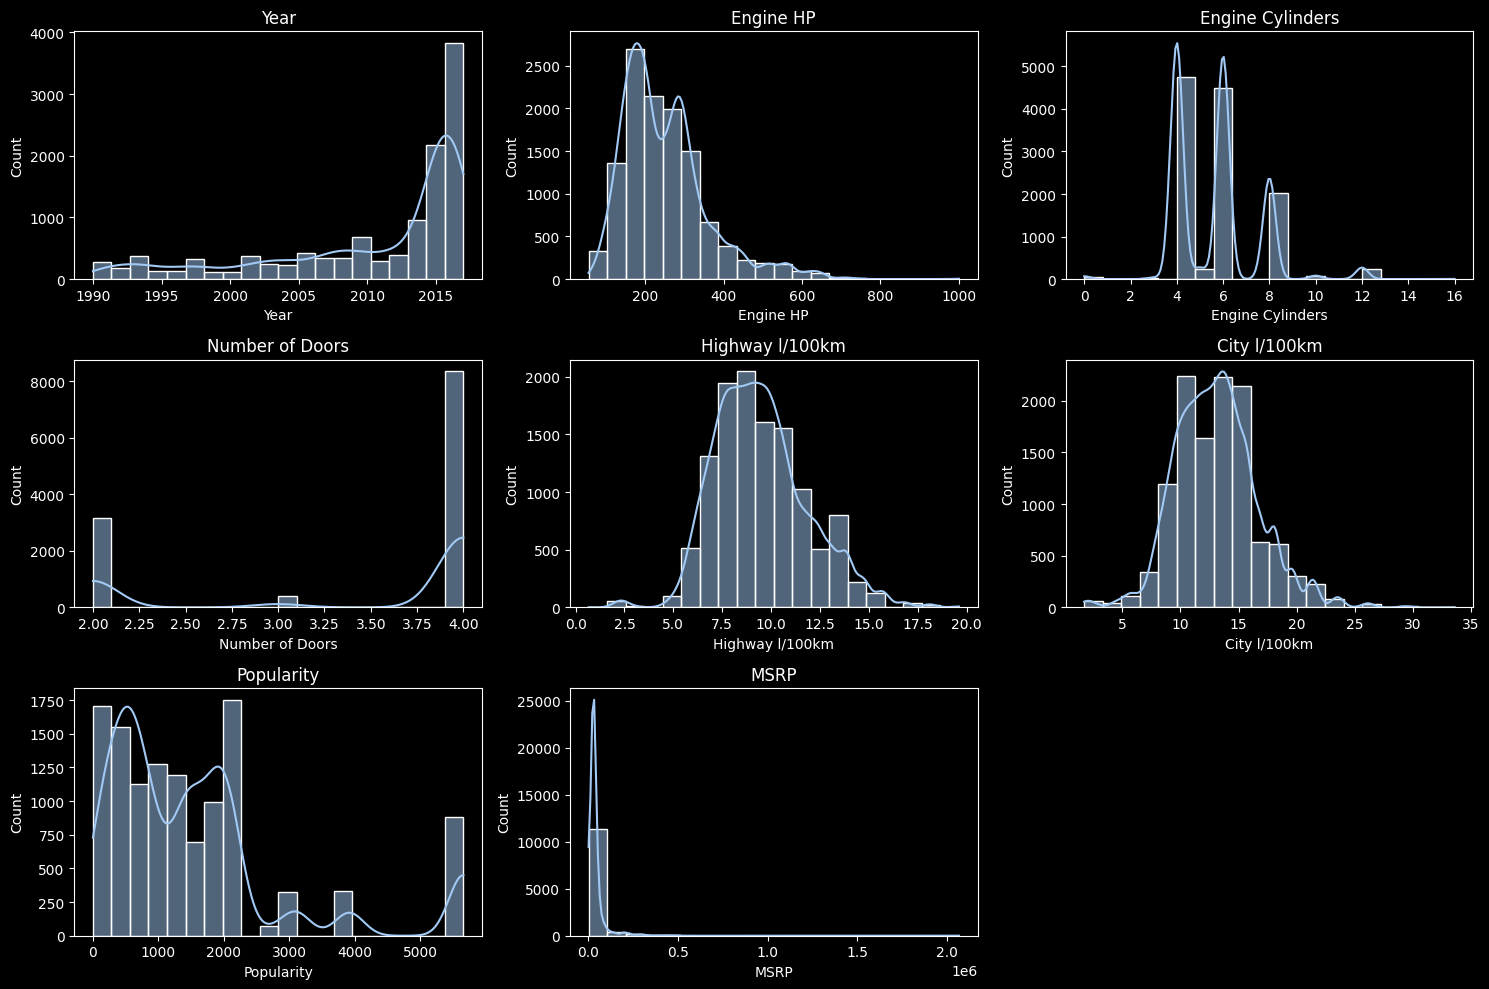

In [133]:
# let's get the numeric fields for some plots and statistics

numeric_filter = [False if t == pd.Int64Dtype or t == pd.Float64Dtype else True for t in df.dtypes]
num_cols = df.loc[:, numeric_filter].columns
# 8 columns, a 3 x 3 minus 1 should do

plt.figure(figsize=(15,10))
sns.set_palette('pastel')

for i, column in enumerate(num_cols, 1):
    plt.subplot(3,3,i)
    sns.histplot(data=df, x=column, kde=True, bins=20)
    plt.title(column)

plt.tight_layout()
plt.show()



In [134]:
# so we have 48 different brands. let's count them
num_of_brands = len(df['Make'].unique())
brands = df['Make'].unique()
brand_counts = {
    brand: len(df[df['Make'] == brand]) for brand in brands
}
brand_counts



{'BMW': 334,
 'Audi': 328,
 'FIAT': 62,
 'Mercedes-Benz': 353,
 'Chrysler': 187,
 'Nissan': 558,
 'Volvo': 281,
 'Mazda': 423,
 'Mitsubishi': 213,
 'Ferrari': 69,
 'Alfa Romeo': 5,
 'Toyota': 746,
 'McLaren': 5,
 'Maybach': 16,
 'Pontiac': 186,
 'Porsche': 136,
 'Saab': 111,
 'GMC': 515,
 'Hyundai': 303,
 'Plymouth': 82,
 'Honda': 449,
 'Oldsmobile': 150,
 'Suzuki': 351,
 'Ford': 881,
 'Cadillac': 397,
 'Kia': 231,
 'Bentley': 74,
 'Chevrolet': 1123,
 'Dodge': 626,
 'Lamborghini': 52,
 'Lincoln': 164,
 'Subaru': 256,
 'Volkswagen': 809,
 'Spyker': 3,
 'Buick': 196,
 'Acura': 252,
 'Rolls-Royce': 31,
 'Maserati': 58,
 'Lexus': 202,
 'Aston Martin': 93,
 'Land Rover': 143,
 'Lotus': 29,
 'Infiniti': 330,
 'Scion': 60,
 'Genesis': 3,
 'HUMMER': 17,
 'Tesla': 18,
 'Bugatti': 3}

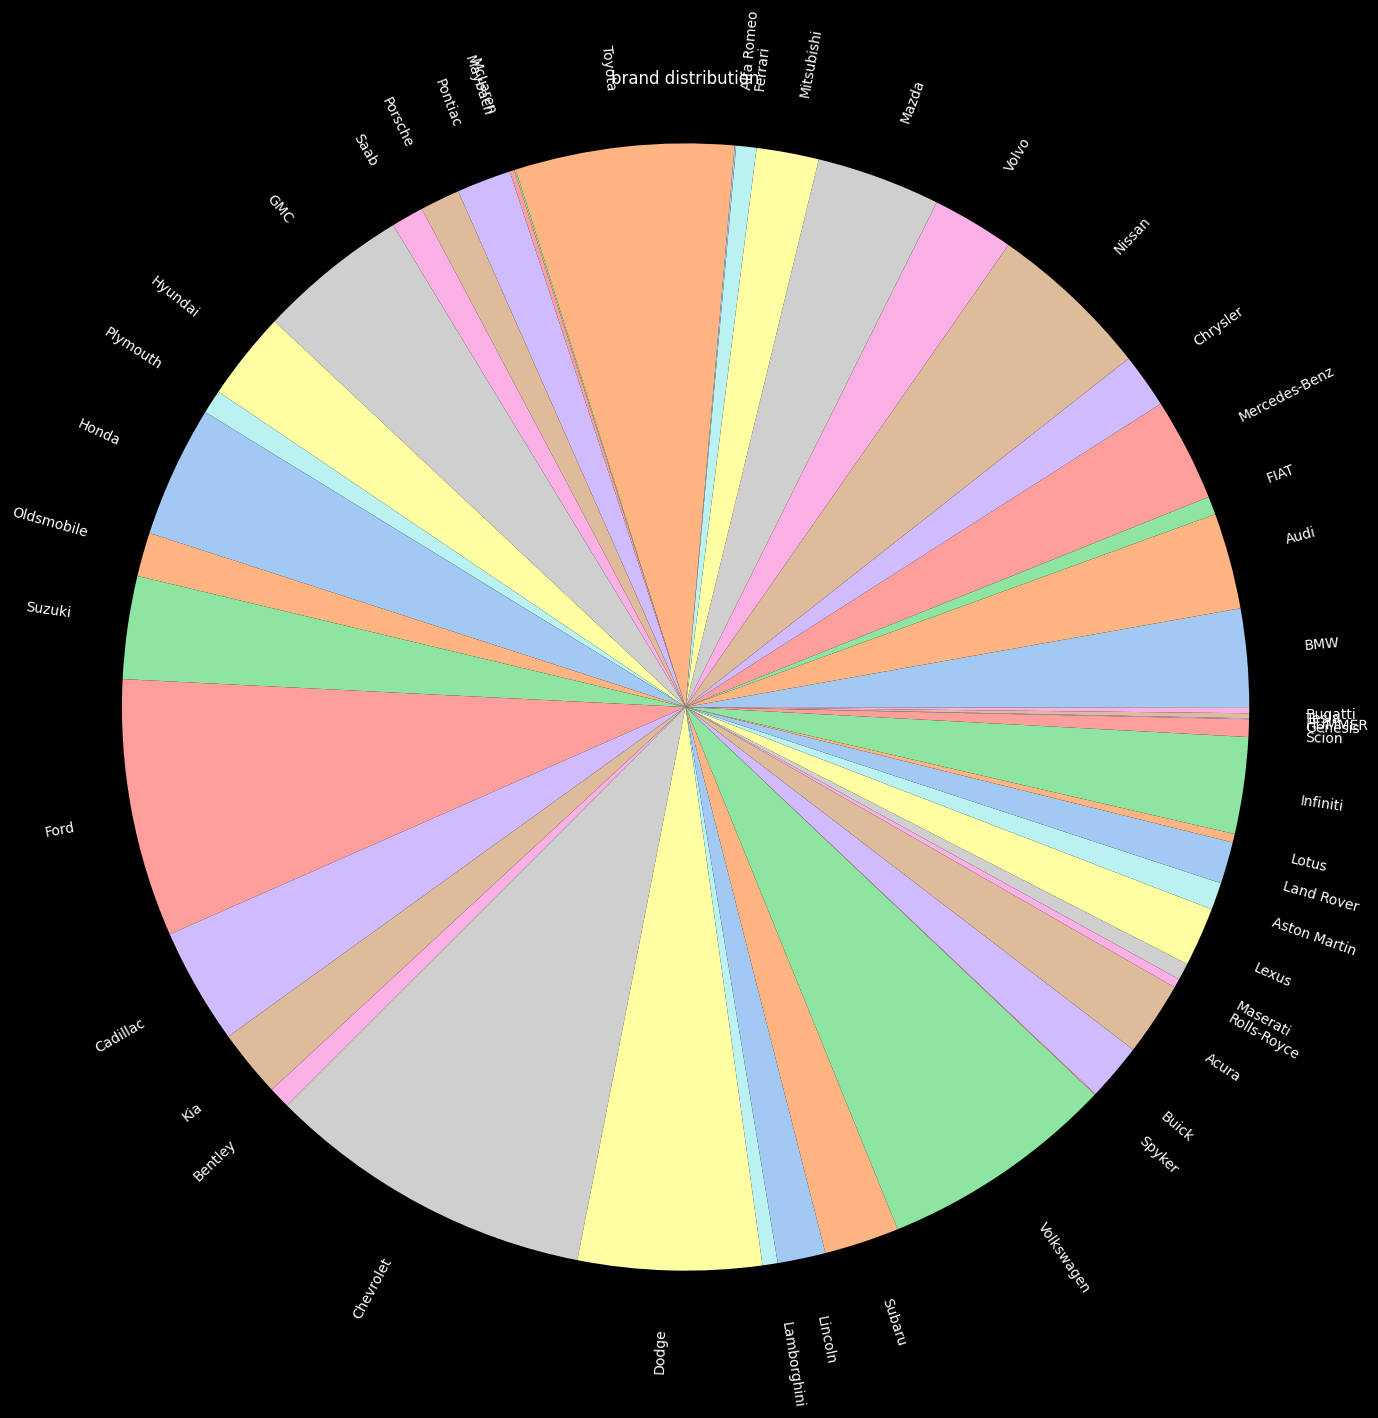

In [135]:
brand_vals = np.array([e for e in brand_counts.values()])
brands = np.array([b for b in brands])

plt.figure(figsize=(16,16))
plt.pie(brand_vals, labels=brands.tolist(), rotatelabels=True)
plt.axis('equal')
plt.title('brand distribution')
plt.show()

In [136]:

df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'Highway l/100km', 'City l/100km', 'Popularity', 'MSRP'],
      dtype='object')

<Axes: xlabel='Engine Cylinders', ylabel='Engine HP'>

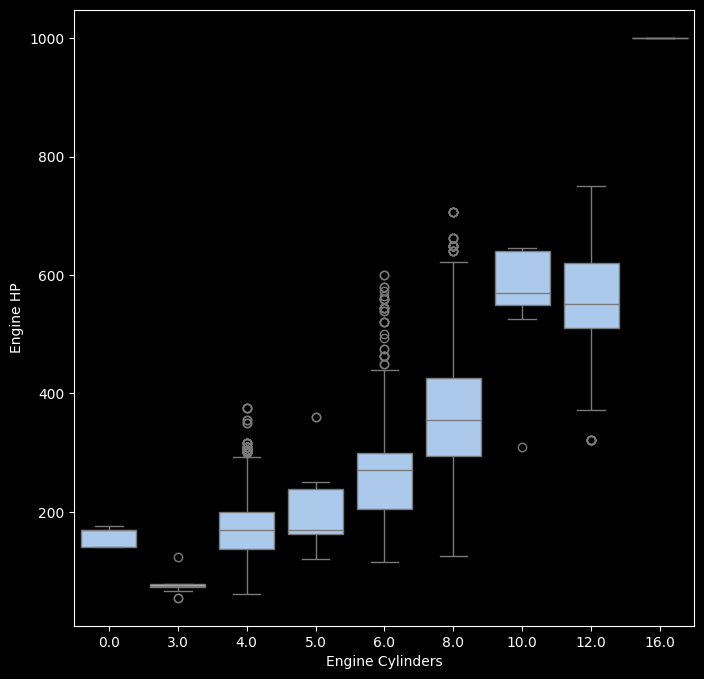

In [137]:
# bivariate analysis of engine hp and number of cylinders
plt.figure(figsize=(8,8))
sns.set_palette(palette='pastel')

sns.boxplot(x='Engine Cylinders', y='Engine HP', data=df)

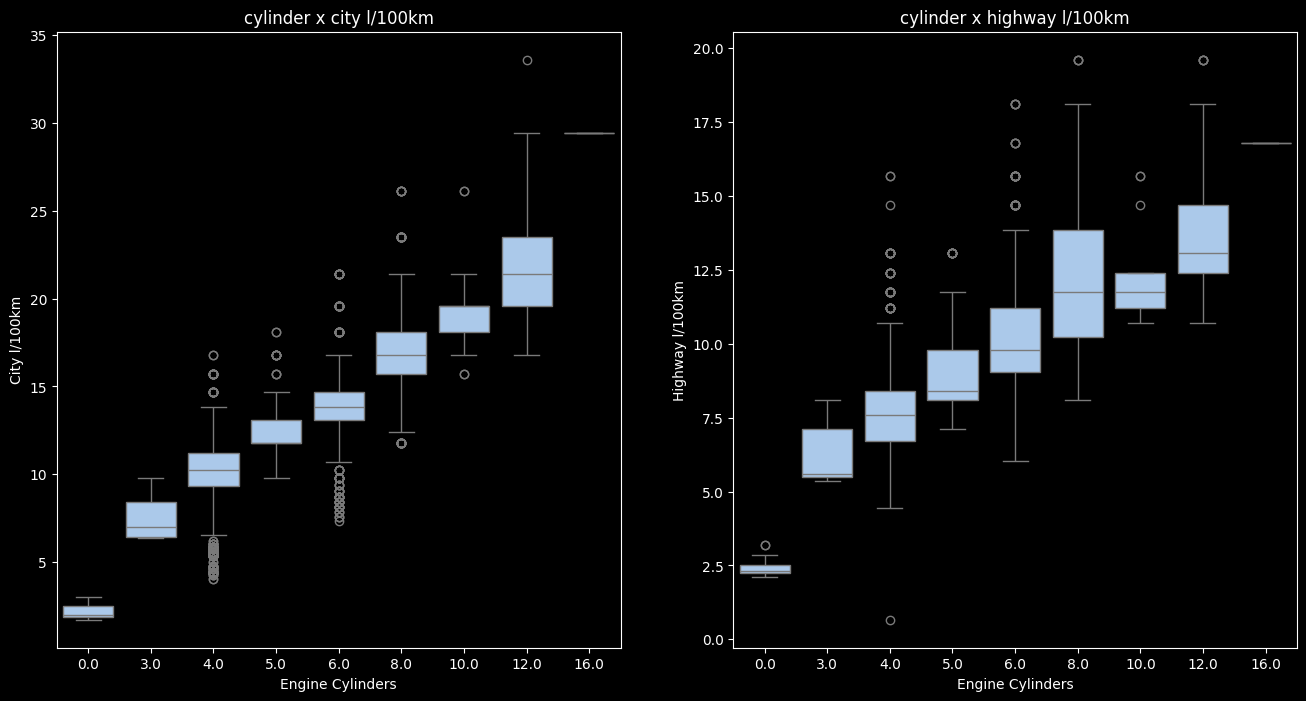

In [138]:
# cylinders and city mpg

plt.figure(figsize=(16,8))
sns.set_palette(palette='pastel')

plt.subplot(1,2,1)
sns.boxplot(x='Engine Cylinders', y='City l/100km', data=df)
plt.title("cylinder x city l/100km")

plt.subplot(1,2,2)
sns.boxplot(x='Engine Cylinders', y='Highway l/100km', data=df)
plt.title("cylinder x highway l/100km")

plt.show()

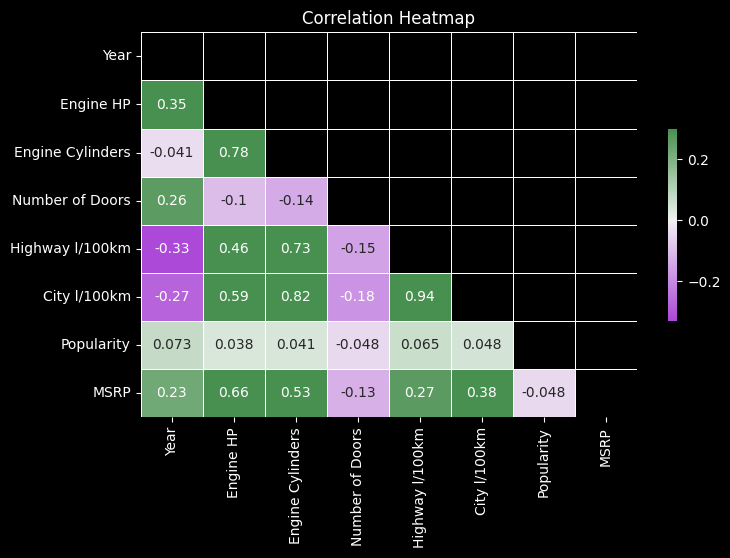

In [139]:
# correlation heatmap
df_clean = df.loc[:, numeric_filter]
corr = df_clean.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(8, 5))

cmap = sns.diverging_palette(290, 130, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=False, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Heatmap')
plt.show()

So far we have only looked at general features of the dataset regardless of the make and model of the cars. \
I think there's more insightful analysis when we start comparing manufacturers. \
#### Manufacturer Showdown
Chevrolet x Toyota to compare regular cars \
Porsche x Ferrari to compare european sport cars

In [140]:
chevvy_df = df[df['Make'] == 'Chevrolet']
toyota_df = df[df['Make'] == 'Toyota']
porsche_df = df[df['Make'] == 'Porsche']
ferrari_df = df[df['Make'] == 'Ferrari']

In [141]:
# annotating function parameters helps when we are calling the function.
# python lsp actually shows the types of parameters so it's a bit easier to use
def make_hist_compare(df1: pd.DataFrame, df2: pd.DataFrame, label1: str, label2: str, columns: list):
    for col in columns:
        plt.hist(df1[col], histtype='step', label=label1)
        plt.hist(df2[col], histtype='step', label=label2)

        plt.title(col)
        plt.legend()
        plt.show()

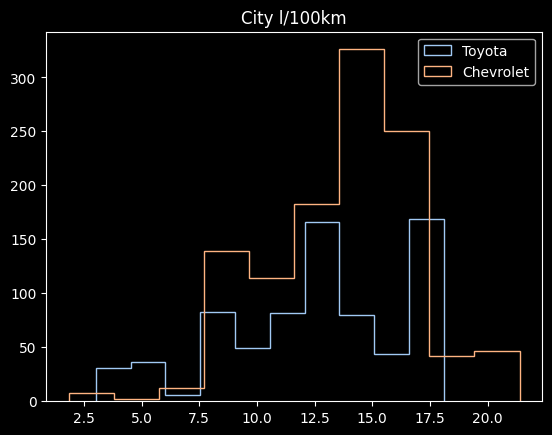

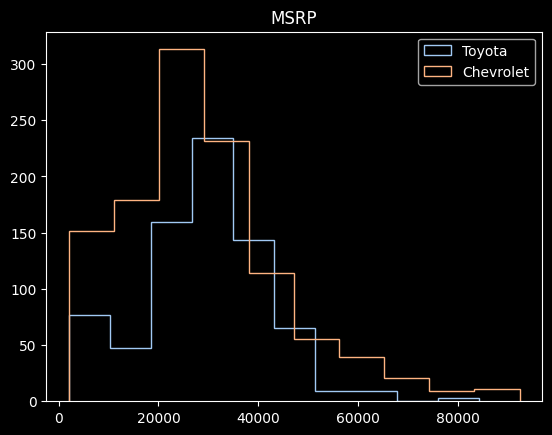

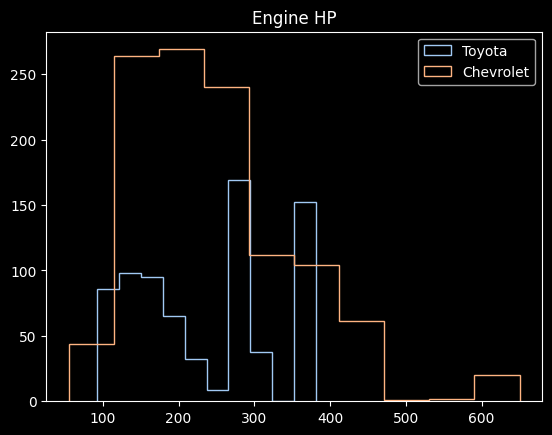

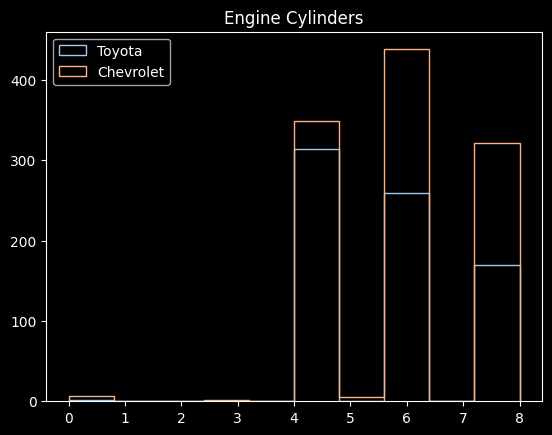

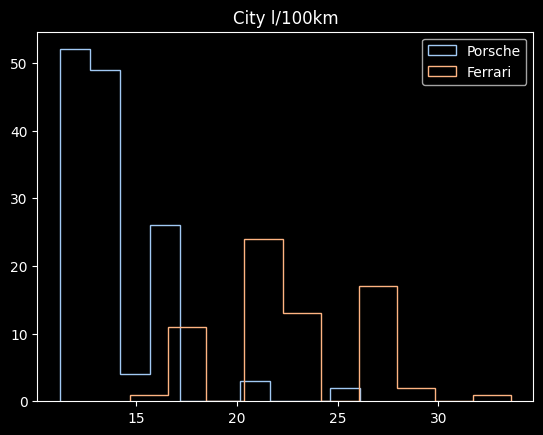

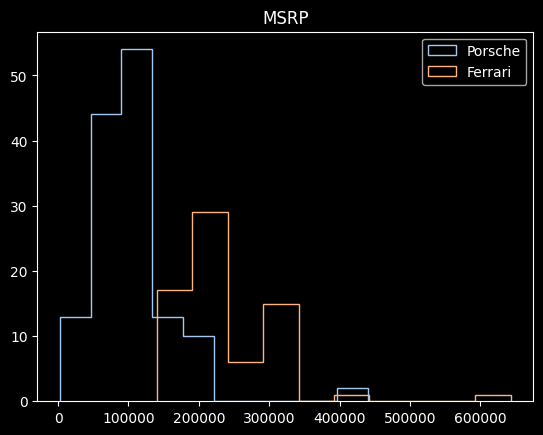

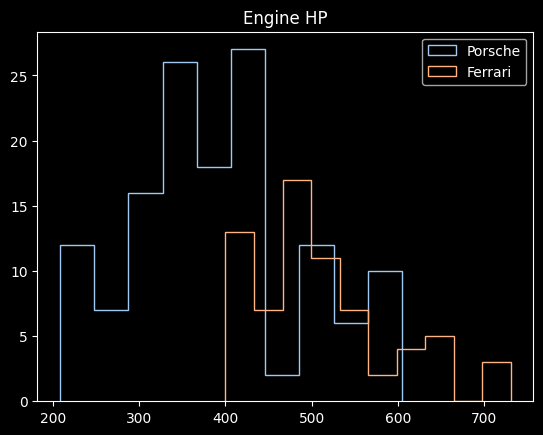

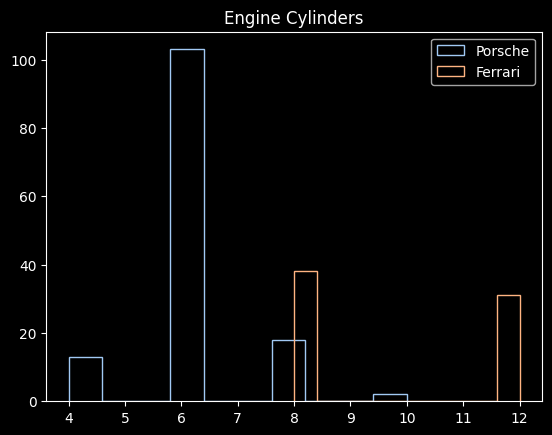

In [142]:
columns = ['City l/100km', 'MSRP', 'Engine HP', 'Engine Cylinders']

make_hist_compare(toyota_df, chevvy_df, 'Toyota', 'Chevrolet', columns)
make_hist_compare(porsche_df, ferrari_df, 'Porsche', 'Ferrari', columns)

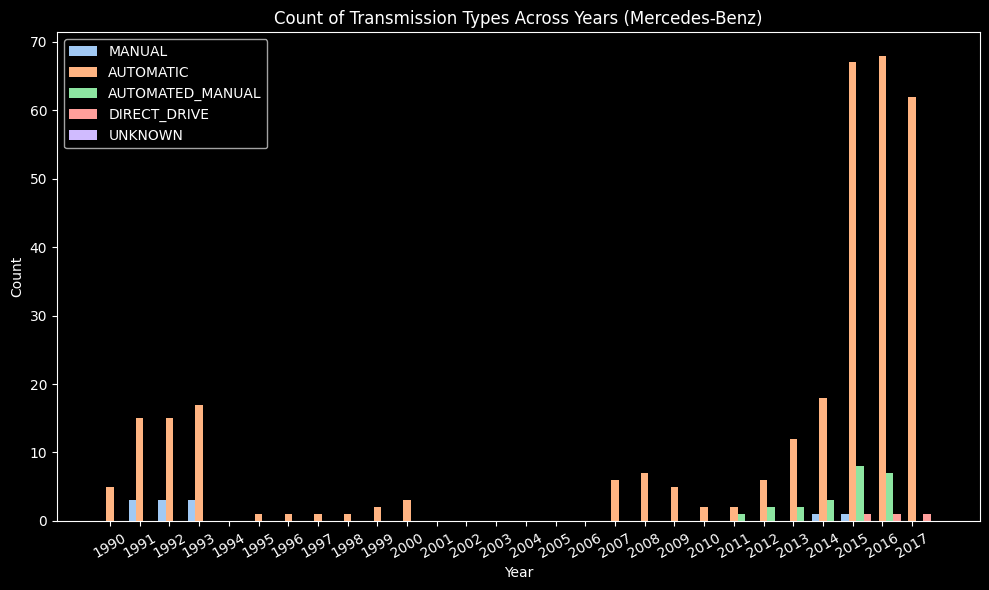

In [157]:
# i wanna see how transmission types are distributed across the years
def trans_distribution_years(make: str):
    years = np.sort(df['Year'].unique())
    trans_types = df['Transmission Type'].unique()

    bar_width = 0.25
    index = np.arange(len(years))

    plt.figure(figsize=(10, 6))

    for i, ttype in enumerate(trans_types):
        counts_by_type = [
            df.loc[(df['Year'] == year) & (df['Transmission Type'] == ttype) & (df['Make'] == make)].shape[0]
            for year in years
        ]
        plt.bar(index + i * bar_width, counts_by_type, bar_width, label=ttype)

    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title(f'Count of Transmission Types Across Years ({make})')
    plt.xticks(index + bar_width, [year for year in years], rotation=30)
    plt.legend()
    plt.tight_layout()
    plt.show()

trans_distribution_years('Mercedes-Benz')